In [383]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [384]:
df=pd.read_csv(r"D:\data\simple house data price\house_price.csv")
df.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    47 non-null     int64
 1   rooms   47 non-null     int64
 2   price   47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [386]:
#normalize
def normalize(x):
    z=(x-np.min(x))/(np.max(x)-np.min(x))
    return z

In [387]:
X=df.iloc[:,:2]
X.head()

,area,rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [388]:
y=df.iloc[:,-1]
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [389]:
X_norm=normalize(X)

df.head()

c:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\ProgramData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

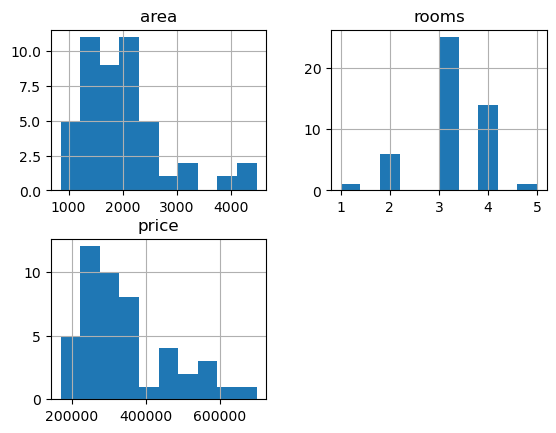

In [390]:
df.hist()

In [391]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [392]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)



LinearRegression()

In [393]:
y_pred=le.predict(X_test)

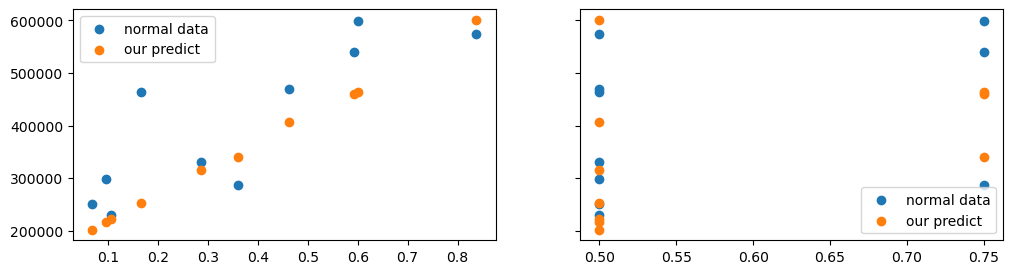

In [394]:
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test.iloc[:,i],y_test,label="normal data")
    ax[i].scatter(X_test.iloc[:,i],y_pred,label="our predict ")
    ax[i].legend()

In [395]:
w_init=le.coef_
w_init

array([519310.39717892, -54050.25770387])

In [396]:
b_init=le.intercept_

In [397]:
model_predict=np.dot(X_test,w_init)+b_init

In [398]:
model_predict==y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [399]:

mse=np.mean(y_pred-y_test)**2/2*X_test.shape[0]
np.sqrt(mse)

125611.52919870355

In [400]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.5148848812741443

try implement data in another way using a gradient descent

In [416]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=10000)
sgd.fit(X_norm,y)
print(sgd)

print("number of iteration=",sgd.n_iter_ ,"&&&&","number of wieghts updates=" ,sgd.t_)

SGDRegressor(max_iter=10000)
number of iteration= 5403 &&&& number of wieghts updates= 253942.0


In [403]:
w_norm=sgd.coef_
b_norm=sgd.intercept_

In [412]:
ypred_sgd=sgd.predict(X_norm)
ypred_sgd

array([355209.14948061, 286682.42080817, 395455.00600253, 266480.29220303,
       472218.87890874, 334213.66144339, 277708.68252963, 263160.34925989,
       256769.95987972, 272270.05326991, 328095.20352621, 341068.71340535,
       326112.48294112, 668360.66406576, 241541.79795251, 377042.86686367,
       253427.5819797 , 237190.89454473, 419056.27789499, 476433.81658502,
       309388.69796749, 330656.1174677 , 287226.28373414, 331086.44961905,
       598043.94592703, 218699.55506169, 267375.28693617, 412586.68817064,
       368261.85970394, 427678.88436636, 323993.79662454, 214734.11389152,
       341691.7766755 , 495661.75011283, 310555.62416362, 264520.00657482,
       237598.79173921, 354200.62397286, 637417.24267267, 358279.59591764,
       300199.79361328, 373428.55750067, 413345.71717229, 232296.12821099,
       189795.619641  , 316130.21915483, 232704.02540546])

In [405]:
#compare to see the difference between real price and predict price
y_pred=np.dot(X_norm,w_norm)+b_norm
print(y_pred[:4])
print(y[:4])

[355209.14948061 286682.42080817 395455.00600253 266480.29220303]
0    399900
1    329900
2    369000
3    232000
Name: price, dtype: int64


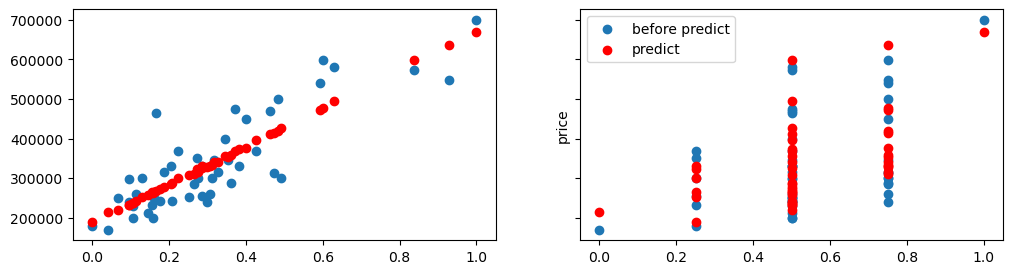

In [406]:
fig,ax=plt.subplots(1,2,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm.iloc[:,i],y,label="before predict")
    ax[i].scatter(X_norm.iloc[:,i],y_pred,color="r",label="predict")
ax[i].set_ylabel("price")
ax[i].legend()
plt.show()


In [407]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.7325008647306364

conclusion:
using gradient descent in linear help us to improve the proficiency of our model 